In [270]:
import os
import pandas as pd
import numpy as np
import sqlite3 as db

import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score,recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#import the ICU_patients dataset stored
#in the folder ICU_patients

file =('ICU_patients/\
ICU.csv')

#ICU_patients dataset
data = pd.read_csv(file, index_col=0)

#displaying the dataset
data.head()


,ID,Survive,Age,AgeGroup,Sex,Infection,SysBP,Pulse,Emergency
1,4,0,87,3,1,1,80,96,1
2,8,1,27,1,1,1,142,88,1
3,12,1,59,2,0,0,112,80,1
4,14,1,77,3,0,0,100,70,0
5,27,0,76,3,1,1,128,90,1


In [271]:
#checking if there is any null values
data.info(verbose=True, show_counts=True)

#all the columns have the same number of entries as the number of rows
#hence all the columns have complete entries (no null entries)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         200 non-null    int64
 1   Survive    200 non-null    int64
 2   Age        200 non-null    int64
 3   AgeGroup   200 non-null    int64
 4   Sex        200 non-null    int64
 5   Infection  200 non-null    int64
 6   SysBP      200 non-null    int64
 7   Pulse      200 non-null    int64
 8   Emergency  200 non-null    int64
dtypes: int64(9)
memory usage: 15.6 KB


In [272]:
#data normalization

df1 = pd.read_csv(file, index_col=0)
df1.pop('AgeGroup')
df1.head()


,ID,Survive,Age,Sex,Infection,SysBP,Pulse,Emergency
1,4,0,87,1,1,80,96,1
2,8,1,27,1,1,142,88,1
3,12,1,59,0,0,112,80,1
4,14,1,77,0,0,100,70,0
5,27,0,76,1,1,128,90,1


In [273]:
#separate agegroups (transitive dependency)
df2 = pd.read_csv(file,usecols = ['Age','AgeGroup'])

#unique age with the subsequent age groups
df2.drop_duplicates(keep="first", inplace=True)
df2.head()

#the number of entries
#df2.shape

,Age,AgeGroup
0,87,3
1,27,1
2,59,2
3,77,3
4,76,3


In [274]:
#data visualization
#sqlite normalized dataset

conn = db.connect('test.db',timeout = 20)
c = conn.cursor()

#table 1:patients
c.execute("DROP TABLE IF EXISTS icu")
c.execute("CREATE TABLE icu (ID int, Survive int, Age int,Sex int, Infection int, SysBP int, Pulse int, Emergency int)")
df1.to_sql('icu', conn, if_exists='append', index = False)
#c.execute("SELECT * FROM icu").fetchall()

#colnames = c.description
#for row in colnames:
    #print(row[0])


In [275]:
#table 2: agegroups
c.execute("DROP TABLE IF EXISTS age")
c.execute("CREATE TABLE age (Age int,AgeGroup int)")
df2.to_sql('age', conn, if_exists='append', index = False)
#c.execute("SELECT * FROM age").fetchall()

#colnames = c.description
#for row in colnames:
    #print(row[0])

C:\Users\treei\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


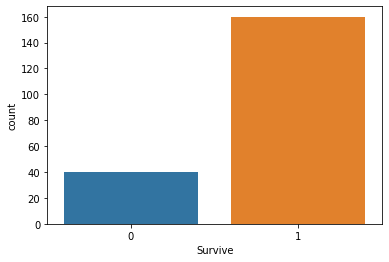

In [276]:
#graph counting the number of patients who survived [==1] vs the number of patients who did not survive [==0]
plt.figure()
sns.countplot(data['Survive'])
plt.show()

In [277]:
#split the data into test and train

#predictors - prediction features 
features = df1.drop(columns='Survive')

#outcome variable 
target = df1[['Survive']]

#train_test_split
x_train , x_test , y_train , y_test = train_test_split(features,target,test_size=0.2,random_state=2)


In [278]:
#metrics dataframe
metrics = pd.DataFrame()

""


In [279]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(x_train,y_train.values.ravel())

#accuracy of the model
#train-model
y_train_pred = lr_model.predict(x_train)
train_lr_acc = accuracy_score( y_train.values.ravel(), y_train_pred)
print("Train Accuracy: ",train_lr_acc)
#test-model
y_test_pred = lr_model.predict(x_test)
test_lr_acc = accuracy_score( y_test.values.ravel(), y_test_pred)
print("Test Accuracy: ",test_lr_acc)


Train Accuracy:  0.8125
Test Accuracy:  0.775


In [ ]:
#Metrics of Logistic Regression Model

In [280]:
#confusion matrix
cf = confusion_matrix(y_test.values.ravel(), y_test_pred)
print("Confusion Matrix:")
print(cf)

#metrics
precision = precision_score(y_test.values.ravel(), y_test_pred)
recall = recall_score(y_test.values.ravel(), y_test_pred)
f1 = f1_score(y_test.values.ravel(), y_test_pred)
roc = roc_auc_score(y_test.values.ravel(), y_test_pred)

lr = {"Train Accuracy":train_lr_acc,"Test_Accuracy":test_lr_acc,"Precision":precision, "Recall":recall, "F1":f1, "ROC": roc}
metrics = metrics.append(lr, ignore_index=True)
print("Precision: ",precision,
     "Recall: ",recall,
     "f1: ",f1,
     "ROC: ",roc)


Confusion Matrix:
[[ 1  8]
 [ 1 30]]
Precision:  0.7894736842105263 Recall:  0.967741935483871 f1:  0.8695652173913043 ROC:  0.5394265232974911


In [203]:
#Decision Tree

In [281]:
df_model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42, max_features = 'auto')

#train-model
df_model.fit(x_train, y_train)

#train-model
y_train_pred = df_model.predict(x_train)
train_df_acc = accuracy_score( y_train.values.ravel(), y_train_pred)
print("Train Accuracy: ",train_df_acc)

#test-model
y_test_pred = df_model.predict(x_test)

test_df_acc = accuracy_score( y_test.values.ravel(), y_test_pred)
print("Test Accuracy: ",test_df_acc)

Train Accuracy:  0.8375
Test Accuracy:  0.825


In [ ]:
#Metrics of Decision Tree Model

In [282]:
#confusion matrix
cf = confusion_matrix(y_test.values.ravel(), y_test_pred)
print("Confusion Matrix:")
print(cf)

#metrics
precision_df = precision_score(y_test.values.ravel(), y_test_pred)
recall_df = recall_score(y_test.values.ravel(), y_test_pred)
f1_df = f1_score(y_test.values.ravel(), y_test_pred)
roc_df = roc_auc_score(y_test.values.ravel(), y_test_pred)
df = {"Train Accuracy":train_df_acc,"Test_Accuracy":test_df_acc,"Precision":precision_df, "Recall":recall_df, "F1":f1_df, "ROC": roc_df}
metrics = metrics.append(df, ignore_index=True)
print("Precision: ",precision_df,
     "Recall: ",recall_df,
     "f1: ",f1_df,
     "ROC: ",roc_df)

Confusion Matrix:
[[ 2  7]
 [ 0 31]]
Precision:  0.8157894736842105 Recall:  1.0 f1:  0.898550724637681 ROC:  0.6111111111111112


In [283]:
#Random Forest

model_rf = RandomForestClassifier(n_estimators = 10,random_state=42)

#train-model
model_rf.fit(x_train, y_train.values.ravel())

#train-model
y_train_pred = model_rf.predict(x_train)
train_rf_acc = accuracy_score( y_train.values.ravel(), y_train_pred)
print("Train Accuracy: ",train_rf_acc)

#test-model
y_test_pred = model_rf.predict(x_test)

test_rf_acc = accuracy_score( y_test.values.ravel(), y_test_pred)
print("Test Accuracy: ",test_rf_acc)


Train Accuracy:  0.99375
Test Accuracy:  0.825


In [284]:
#Metrics of Random Forest Model

#confusion matrix
cf = confusion_matrix(y_test.values.ravel(), y_test_pred)
print("Confusion Matrix:")
print(cf)

#metrics
precision_rf = precision_score(y_test.values.ravel(), y_test_pred)
recall_rf = recall_score(y_test.values.ravel(), y_test_pred)
f1_rf = f1_score(y_test.values.ravel(), y_test_pred)
roc_rf = roc_auc_score(y_test.values.ravel(), y_test_pred)

rf = {"Train Accuracy":train_rf_acc,"Test_Accuracy":test_rf_acc,"Precision":precision_rf, "Recall":recall_rf, "F1":f1_rf, "ROC": roc_rf}
metrics = metrics.append(rf, ignore_index=True)

print("Precision: ",precision_rf,
     "Recall: ",recall_rf,
     "f1: ",f1_rf,
     "ROC: ",roc_rf)

Confusion Matrix:
[[ 3  6]
 [ 1 30]]
Precision:  0.8333333333333334 Recall:  0.967741935483871 f1:  0.8955223880597015 ROC:  0.6505376344086022


In [ ]:
metrics.index = ['Logistic Regression', 'Decsion Tree', 'Random Forest']
print(metrics)

In [258]:
#Conclusion
#Decision tree and random forest have the best test accuracy.
#ROC (Receiver Operator Characteristic - that is the ability of the model to distinguish between the two classes),
# of the Random Forest Model is higher than the other two models in addition to precision

0.46774193548387094
                           F1  Precision       ROC    Recall  Test_Accuracy  \
Logistic Regression  0.869565   0.789474  0.539427  0.967742          0.775   
Decsion Tree         0.898551   0.815789  0.611111  1.000000          0.825   
Random Forest        0.895522   0.833333  0.650538  0.967742          0.825   

                     Train Accuracy  
Logistic Regression         0.81250  
Decsion Tree                0.83750  
Random Forest               0.99375  
